In [14]:
import glob
import zipfile

import shutil
import os
import random

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

### Unzipping files

In [4]:
files = glob.glob('archive.zip')

for file in files:
    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall('data')

### Creating folders for each class

In [7]:
food_classes = ['bread', 'dairy_product', 'dessert', 'egg', 'fried_food', 'meat', 
                'noodles_pasta', 'rice', 'seafood', 'soup', 'vegetable_fruits']

In [12]:
def split_data_into_class_folders(path_to_data, class_id):
    imgs_paths = glob.glob(path_to_data + '*.jpg')
    
    for path in imgs_paths:
        basename = os.path.basename(path)
        
        if basename.startswith(str(class_id) + '_'):
            path_to_save = os.path.join(path_to_data, food_classes[class_id])
            
            if not os.path.isdir(path_to_save):
                os.makedirs(path_to_save)
                
            shutil.move(path, path_to_save)

In [16]:
training_path = 'data/training/'
validation_path = 'data/validation/'
evaluation_path = 'data/evaluation/'

paths = [training_path, validation_path, evaluation_path]

In [13]:
for folder_path in paths:
    for i in range(len(food_classes)+1):
        split_data_into_class_folders(folder_path, i)

### Vizualizing some images

In [20]:
def vizualize_some_images(path_to_data):
    
    imgs_paths = []
    labels = []
    
    for r, d, f in os.walk(path_to_data):
        for file in f:
            if file.endswith('.jpg'):
                imgs_paths.append(os.path.join(r, file))
                labels.append(os.path.basename(r))
                
    fig = plt.figure()
    for i in range(16):
        chosen_index = random.randint(0, len(imgs_paths)-1)
        chosen_img = imgs_paths[chosen_index]
        chosen_label = labels[chosen_index]
        
        ax = fig.add_subplot(4, 4, i+1)
        ax.title.set_text(chosen_label)
        ax.imshow(Image.open(chosen_img))
        
    fig.tight_layout(pad=0.5)
    plt.show()

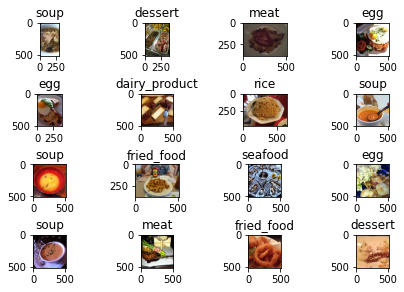

In [21]:
vizualize_some_images(training_path)